In [17]:
cur_date = '091125'

library(tidyverse)
library(stringr)
library(reshape2)

arsenic_df<-read_csv("Input/Forest1_KM.csv")
citation<-arsenic_df$Citation
pre_fire<-arsenic_df$Pre_Fire
post_fire<-arsenic_df$Post_Fire
percent_change <- round(arsenic_df$Percent_Change, 2)
arsenic_df$label <- paste(arsenic_df$Water, arsenic_df$Citation, sep = "\n")

Rows: 9 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Citation, Water
dbl (3): Pre_Fire, Post_Fire, Percent_Change
lgl (2): Unburned, Burned

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [18]:
head(arsenic_df)

Citation,Water,Pre_Fire,Post_Fire,Unburned,Burned,Percent_Change,label
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<chr>
"(Mansilha et al., 2020)",Untreated Ground Water,1.6600000,0.878000000,NA,NA,-47.10843,"Untreated Ground Water (Mansilha et al., 2020)"
"(Pennino et al., 2022)",Finished Ground Water,1.3500000,1.620000000,NA,NA,20.00000,"Finished Ground Water (Pennino et al., 2022)"
"(Jankowski et al., 2023)",Finished and Untreated Ground Water,1.4000000,1.400000000,NA,NA,0.00000,"Finished and Untreated Ground Water (Jankowski et al., 2023)"
"(Burton et al., 2016)",Untreated Surface Water,0.3425714,0.008329695,NA,NA,-97.56848,"Untreated Surface Water (Burton et al., 2016)"
"(Murphy et al., 2020)",Untreated Surface Water,2.0000000,3.200000000,NA,NA,60.00000,"Untreated Surface Water (Murphy et al., 2020)"
"(Ré et al., 2020)",Untreated Surface Water,0.1970000,0.617000000,NA,NA,213.19797,"Untreated Surface Water (Ré et al., 2020)"


insert words about what this figure shows. 

In [49]:
longer_arsenic_df = arsenic_df[,c(1:4,7,8)] %>%
    pivot_longer(cols = 3:4, names_to = 'Variable', values_to = 'As Concentration') %>%
    # cleaning up names
    separate(Variable, c("Variable", NA)) %>%
    rename(Water_Citation = label)

head(longer_arsenic_df)

Citation,Water,Percent_Change,Water_Citation,Variable,As Concentration
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
"(Mansilha et al., 2020)",Untreated Ground Water,-47.10843,"Untreated Ground Water (Mansilha et al., 2020)",Pre,1.660
"(Mansilha et al., 2020)",Untreated Ground Water,-47.10843,"Untreated Ground Water (Mansilha et al., 2020)",Post,0.878
"(Pennino et al., 2022)",Finished Ground Water,20.00000,"Finished Ground Water (Pennino et al., 2022)",Pre,1.350
"(Pennino et al., 2022)",Finished Ground Water,20.00000,"Finished Ground Water (Pennino et al., 2022)",Post,1.620
"(Jankowski et al., 2023)",Finished and Untreated Ground Water,0.00000,"Finished and Untreated Ground Water (Jankowski et al., 2023)",Pre,1.400
"(Jankowski et al., 2023)",Finished and Untreated Ground Water,0.00000,"Finished and Untreated Ground Water (Jankowski et al., 2023)",Post,1.400


In [64]:
label_df = longer_arsenic_df %>%
            select(-Variable) 
label_df[c(1,3,5,7,9,11,13,15,17),]

Citation,Water,Percent_Change,Water_Citation,As Concentration
<chr>,<chr>,<dbl>,<chr>,<dbl>
"(Mansilha et al., 2020)",Untreated Ground Water,-47.108434,"Untreated Ground Water (Mansilha et al., 2020)",1.6600000
"(Pennino et al., 2022)",Finished Ground Water,20.000000,"Finished Ground Water (Pennino et al., 2022)",1.3500000
"(Jankowski et al., 2023)",Finished and Untreated Ground Water,0.000000,"Finished and Untreated Ground Water (Jankowski et al., 2023)",1.4000000
"(Burton et al., 2016)",Untreated Surface Water,-97.568479,"Untreated Surface Water (Burton et al., 2016)",0.3425714
"(Murphy et al., 2020)",Untreated Surface Water,60.000000,"Untreated Surface Water (Murphy et al., 2020)",2.0000000
"(Ré et al., 2020)",Untreated Surface Water,213.197969,"Untreated Surface Water (Ré et al., 2020)",0.1970000
"(Depenbrock et al., 2022)",Untreated Surface Water,0.000000,"Untreated Surface Water (Depenbrock et al., 2022)",0.0000000
"(Rust et al., 2018)",Unfiltered Surface Water,4.827586,"Unfiltered Surface Water (Rust et al., 2018)",29.0000000
"(Rust et al., 2018)",Filtered Surface Water,16.666667,"Filtered Surface Water (Rust et al., 2018)",4.2000000


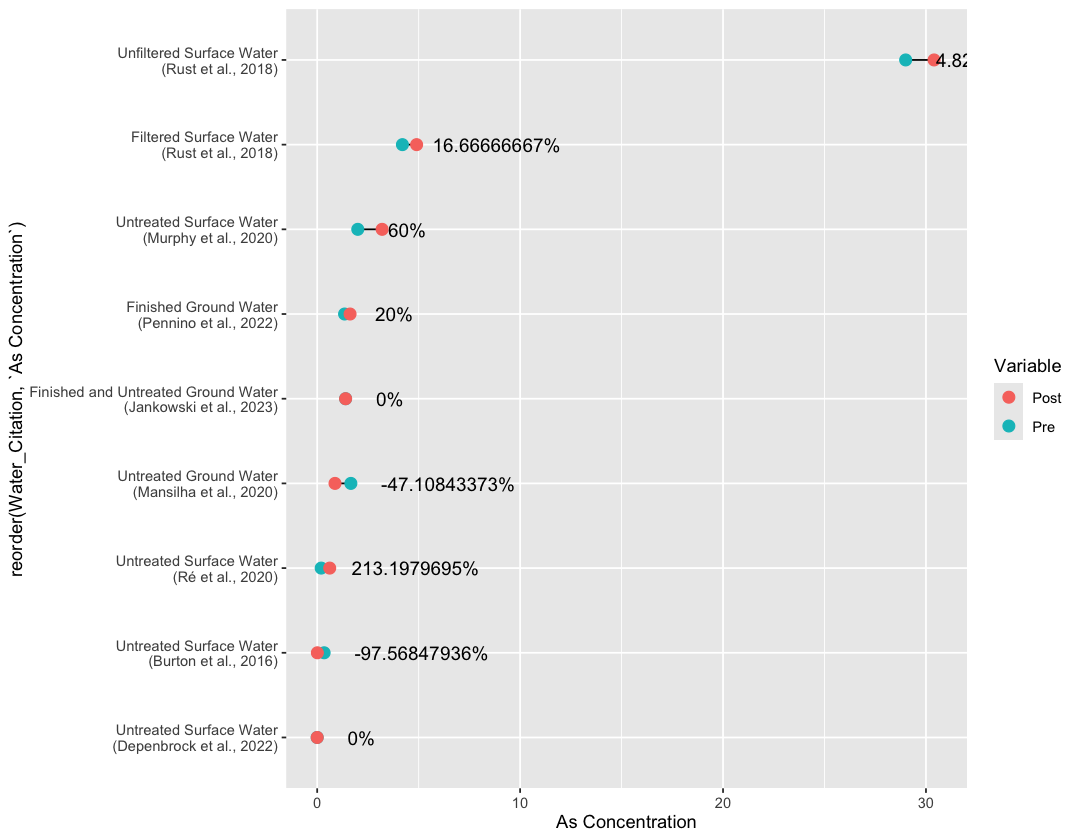

In [66]:
ggplot() +
  geom_line(data = longer_arsenic_df, aes(x = `As Concentration`, y = reorder(Water_Citation, `As Concentration`))) +
  geom_point(data = longer_arsenic_df, aes(x = `As Concentration`, y = reorder(Water_Citation, `As Concentration`),
             color = Variable), size = 3) +

  geom_text(data = label_df[c(1,3,5,7,9,11,13,15,17),], 
            aes(x = `As Concentration` + 1.5, y = reorder(Water_Citation, `As Concentration`), 
                label = paste0(Percent_Change, "%")), size = 4, hjust = 0, color = "black") #+
  # geom_vline(xintercept = 10, linetype = "dashed", color = "black", linewidth = 0.5) +
  # geom_text(aes(x = 11, label = "US EPA MCL", y = 8.7), angle = 270, fontface = "bold") +

  # scale_x_continuous(breaks = seq(0, 30, by = 5), limits = c(0, 35)) +

  # theme_minimal() +

  # theme(#panel.background = element_rect(color = "grey", fill = "lightgrey", linewidth = 1),
  #   axis.title = element_text(face = "bold", size = rel(1.7)),
  #   axis.text = element_text(size = 12),
  #   legend.title = element_text(face = "bold"),
  #   legend.position = "right") 

Warning message in geom_text(aes(x = 11, label = "US EPA MCL", y = 8.7), angle = 270, :
“All aesthetics have length 1, but the data has 9 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


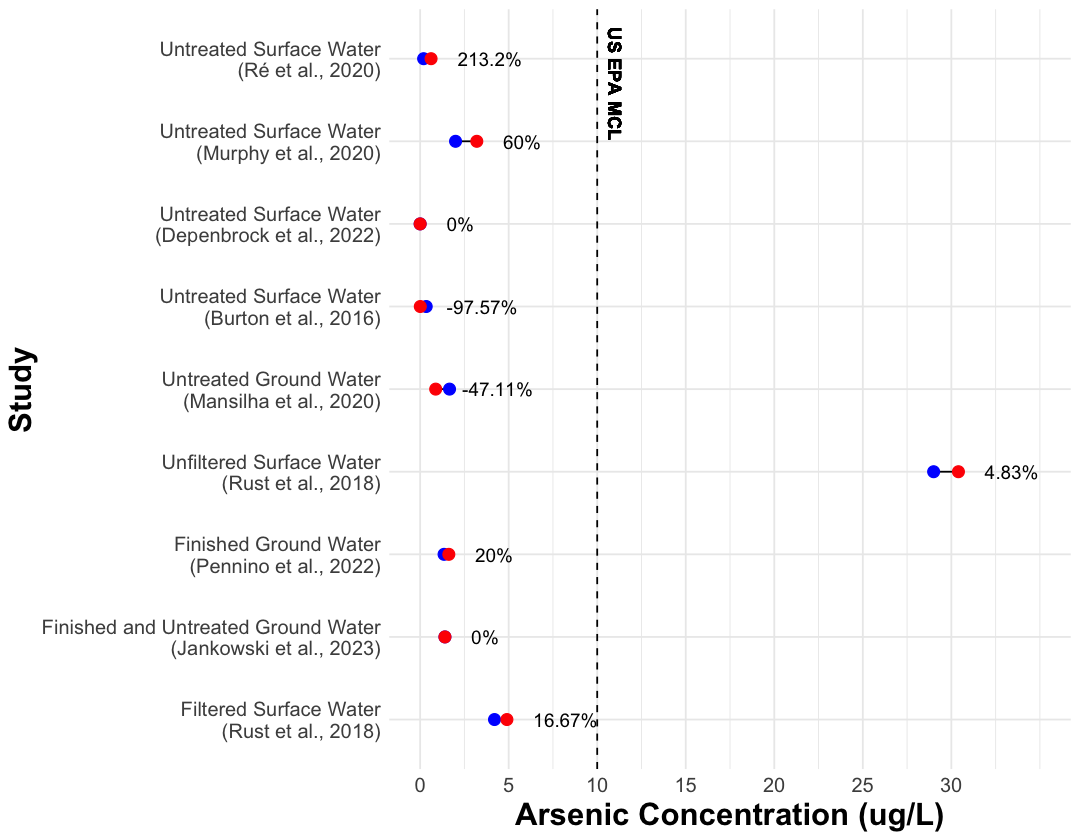

In [38]:
options(repr.plot.width=9, repr.plot.height=7) #changing size
dumbbell_plot <- ggplot(arsenic_df, aes(y = label)) +
  geom_segment(aes(x = pre_fire, xend = post_fire, yend = label), color = "black") +
  geom_point(aes(x = pre_fire), color = "blue", size = 3) +
  geom_point(aes(x = post_fire), color = "red", size = 3) +
  geom_text(aes(x = post_fire + 1.5, label = paste0(percent_change, "%")),
            size = 4, hjust = 0, color = "black") +
  geom_vline(xintercept = 10, linetype = "dashed", color = "black", linewidth = 0.5) +
  geom_text(aes(x = 11, label = "US EPA MCL", y = 8.7), angle = 270, fontface = "bold") +

  scale_x_continuous(breaks = seq(0, 30, by = 5), limits = c(0, 35)) +

  theme_minimal() +

  theme(#panel.background = element_rect(color = "grey", fill = "lightgrey", linewidth = 1),
    axis.title = element_text(face = "bold", size = rel(1.7)),
    axis.text = element_text(size = 12),
    legend.title = element_text(face = "bold"),
    legend.position = "right") + 

  labs(x = "Arsenic Concentration (ug/L)", y = "Study") 
dumbbell_plot